In [1]:
# import libraries
import pandas as pd # data processing CSV file I/0 (e.g. pd.csv)
import numpy as np # Linear algebra
import warnings
warnings.filterwarnings("ignore") # for removing warnings

# 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv("FastagFraudDetection.csv")

In [3]:
df.head(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [4]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
# Shape of data
df.shape

(5000, 13)

In [6]:
# Check the null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [7]:
# check duplicate values
df.duplicated().sum()

0

In [8]:
# for numarical features
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [9]:
# describe or get the statictistcal description for numarical + categorical features
df.describe(include="object")

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


# Observation 1

1 . Fastag ID has 549 Null values

2 . No Duplicate values

3 . Datatypes are almost correct

In [10]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [11]:
# Unique values
print("Unique Vehicle Type: ",df["Vehicle_Type"].unique())
print("Unique TollBoothID: ",df["TollBoothID"].unique())
print("Unique Lane Type: ",df["Lane_Type"].unique())
print("Unique Vehicle Dimensions: ",df["Vehicle_Dimensions"].unique())
print("Unique Fraud indicator: ",df["Fraud_indicator"].unique())
print("Unique Geographical Location: ",df["Geographical_Location"].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID:  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type:  ['Express' 'Regular']
Unique Vehicle Dimensions:  ['Large' 'Small' 'Medium']
Unique Fraud indicator:  ['Fraud' 'Not Fraud']
Unique Geographical Location:  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


# 2. Data Visualisation

In [12]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


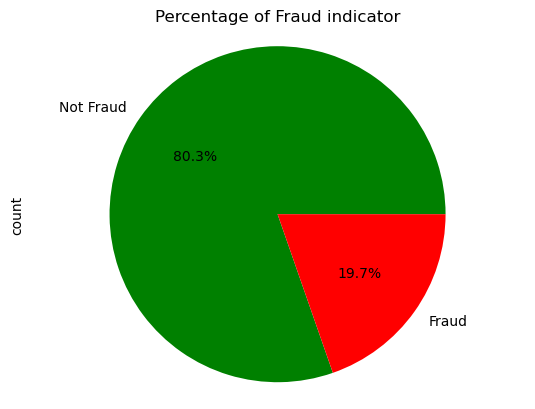

In [13]:
# percentage of fraud and not fraud
print(df["Fraud_indicator"].value_counts())
df["Fraud_indicator"].value_counts().plot(kind = "pie",autopct = "%1.1f%%",colors = ["green","red"])
plt.title("Percentage of Fraud indicator")
plt.axis("equal")
plt.show()

## 2.1 Analyse diffrent Columns

#Analysis based on Fraud indicator

In [14]:
df["Vehicle_Type"].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

Text(0.5, 1.0, 'Vechcle Types')

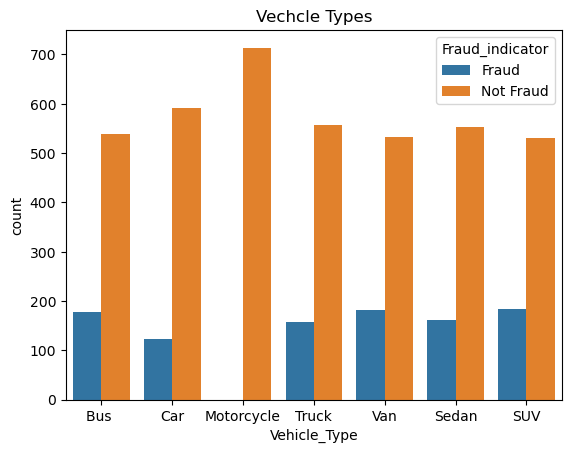

In [15]:
#Vehicle Types
sns.countplot(data=df,x="Vehicle_Type",hue="Fraud_indicator").set_title("Vechcle Types")

Text(0.5, 1.0, 'Vehicle Dimensions')

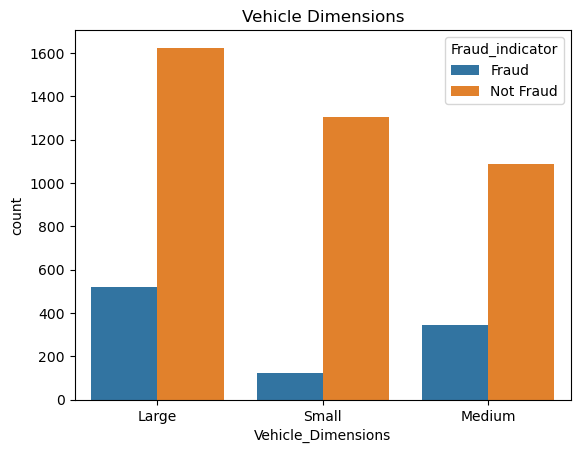

In [16]:
#Vehicle Dimensions
plt.Figure(figsize=(6,5))
sns.countplot(data=df,x="Vehicle_Dimensions",hue="Fraud_indicator").set_title("Vehicle Dimensions")

Text(0.5, 1.0, 'Different Toll Booths')

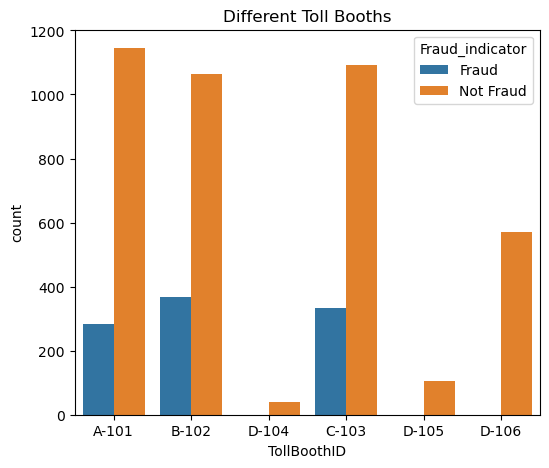

In [17]:
# Different Toll Booths
plt.figure(figsize=(6,5))
sns.countplot(data=df,x="TollBoothID",hue="Fraud_indicator").set_title("Different Toll Booths")

Text(0.5, 1.0, 'Different Lanes')

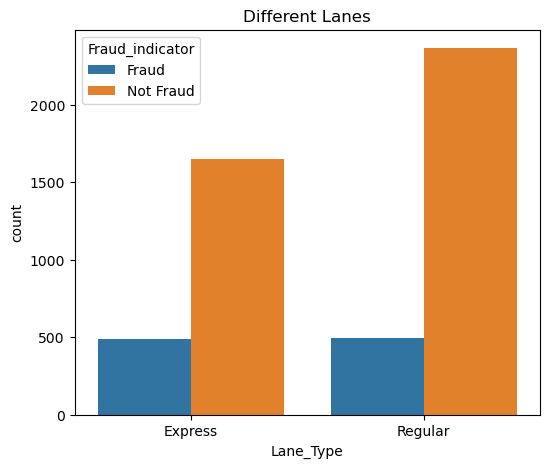

In [18]:
# Lane Type
plt.figure(figsize=(6,5))
sns.countplot(data=df,x="Lane_Type",hue="Fraud_indicator").set_title("Different Lanes")

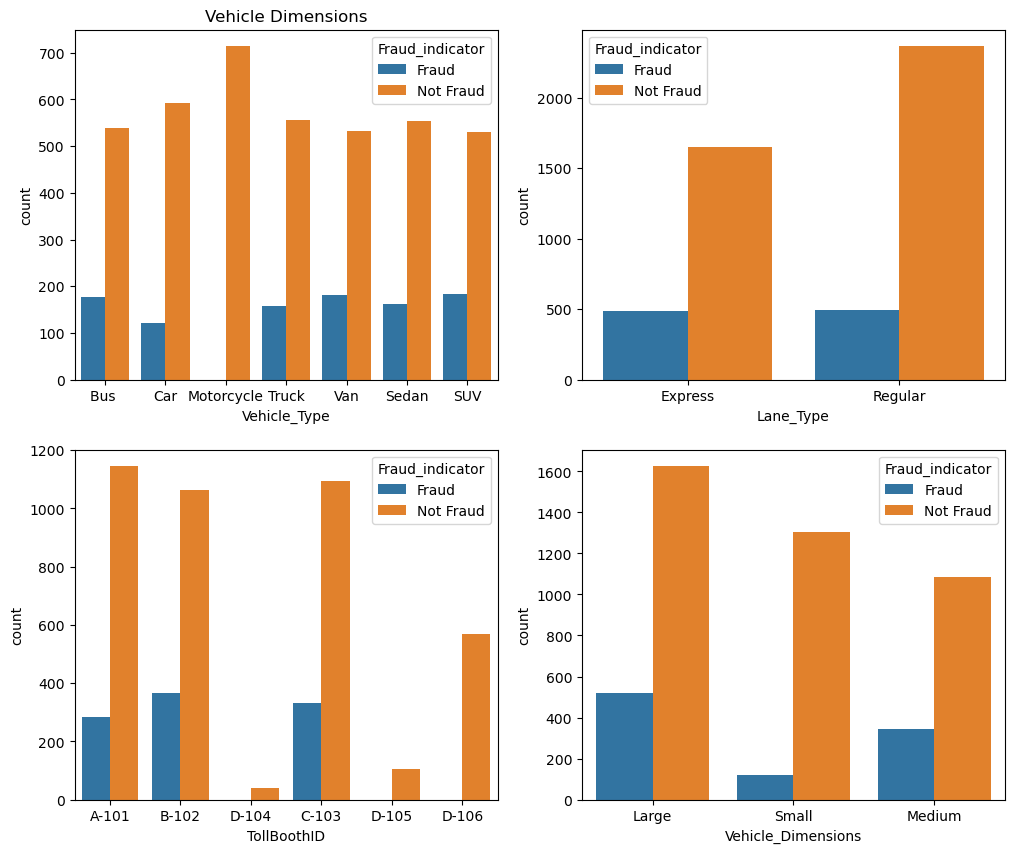

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [19]:
# Combine all graphs together

fig , axes = plt.subplots(2,2,figsize = (12,10),squeeze=False)
#Vehicle Types
sns.countplot(x="Vehicle_Type",data=df,hue="Fraud_indicator",ax=axes[0,0])
#Lane Types
plt.figure(figsize=(6,5))
sns.countplot(x="Lane_Type",data=df,hue="Fraud_indicator",ax=axes[0,1])
#Different Toll Booths
plt.figure(figsize=(6,5))
sns.countplot(x="TollBoothID",data=df,hue="Fraud_indicator",ax=axes[1,0])
#Vehicle Dimenstions
plt.figure(figsize=(6,5))
sns.countplot(x="Vehicle_Dimensions",data=df,hue="Fraud_indicator",ax=axes[1,1])
axes[0,0].set_title("Vehicle Type")
axes[0,0].set_title("Different Lanes")
axes[0,0].set_title("Different Toll Booths")
axes[0,0].set_title("Vehicle Dimensions")
plt.tight_layout()
plt.show()

## Observation 2

1 . Motorcycles are clean not involved in any fraud

2 . Toll Booths 104,105,and 106 have no fraud detected but 101,102,103 have mix data

3 . Express ways has higher fraud percentage based on vehicles than regular ways

4 . very less small vehicles are involved in fraud

In [20]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

## Distribution of transaction amount

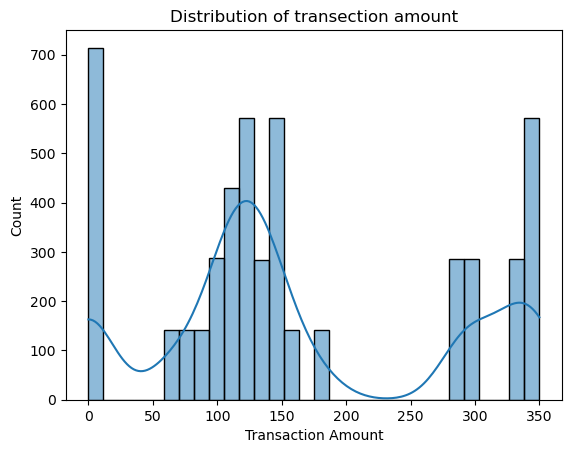

In [21]:
sns.histplot(df["Transaction_Amount"],bins=30,kde=True)
plt.title("Distribution of transection amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

## Distribution of paid amount

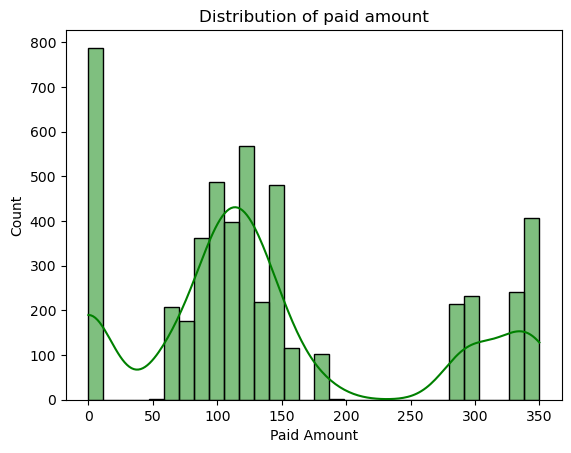

In [22]:
sns.histplot(df["Amount_paid"],bins=30,kde=True,color="green",edgecolor="black")
plt.title("Distribution of paid amount")
plt.xlabel("Paid Amount")
plt.ylabel("Count")
plt.show()

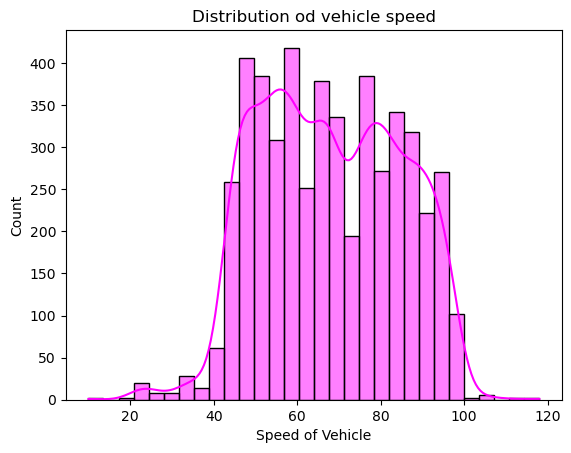

In [23]:
sns.histplot(df["Vehicle_Speed"],bins=30,kde=True,color="magenta",edgecolor = "black")
plt.title("Distribution od vehicle speed")
plt.xlabel("Speed of Vehicle")
plt.ylabel("Count")
plt.show()

## Relationship betweeen transaction amount and paid amount

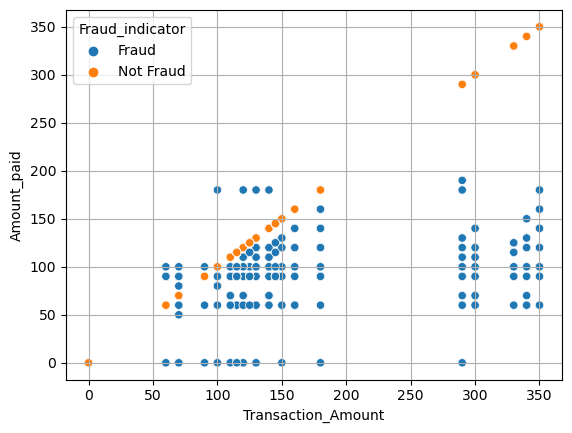

In [24]:
sns.scatterplot(data=df,x="Transaction_Amount",y="Amount_paid",hue="Fraud_indicator")
plt.grid()

## Observation 3

1 . When Transaction Amount is not equal to Amount Paid ==> Fraud

2 . When Transaction Amount is  equal to Amount Paid ==>  Not Fraud

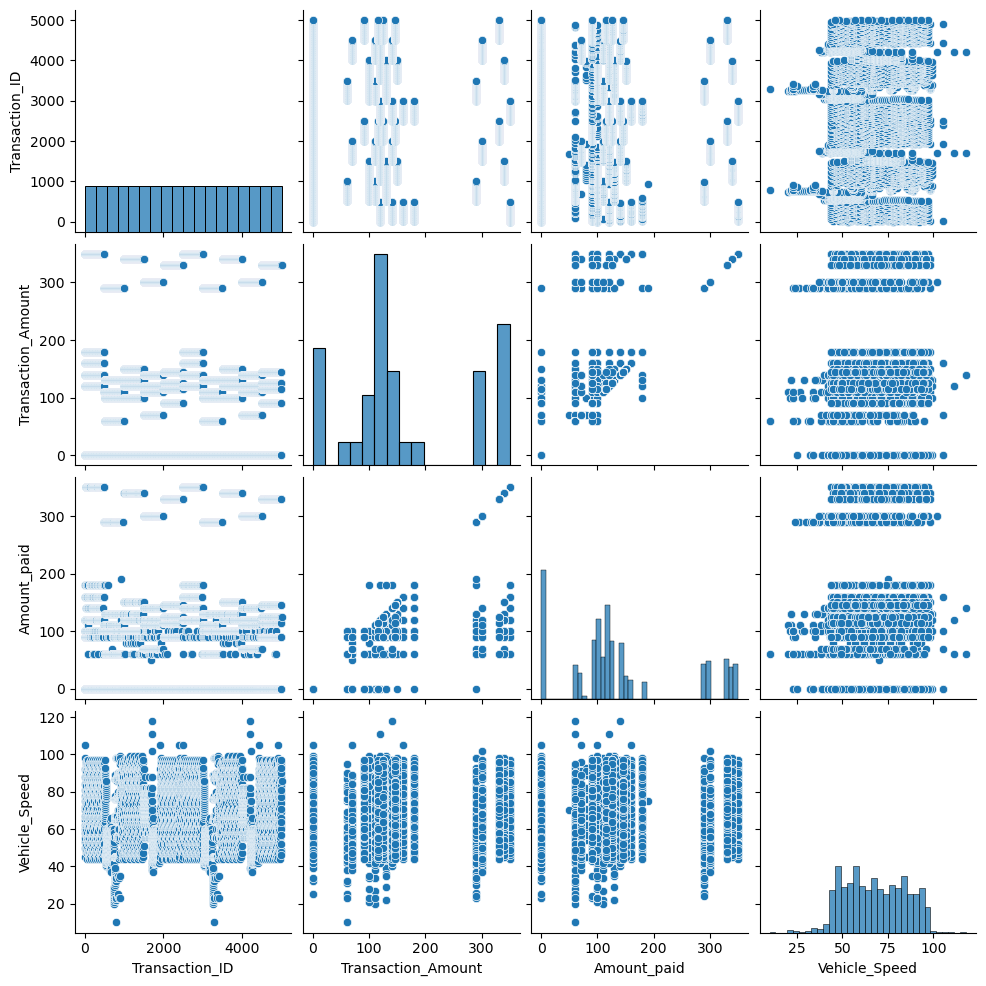

In [25]:
#Pairplot
sns.pairplot(df)

In [26]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# 3. Feature Extraction

In [27]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [28]:
df["State_code"] = df["Vehicle_Plate_Number"].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [29]:
#Remove vehicle number plate feature
df  = df.drop("Vehicle_Plate_Number",axis=1)

In [30]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,State_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


<function matplotlib.pyplot.show(close=None, block=None)>

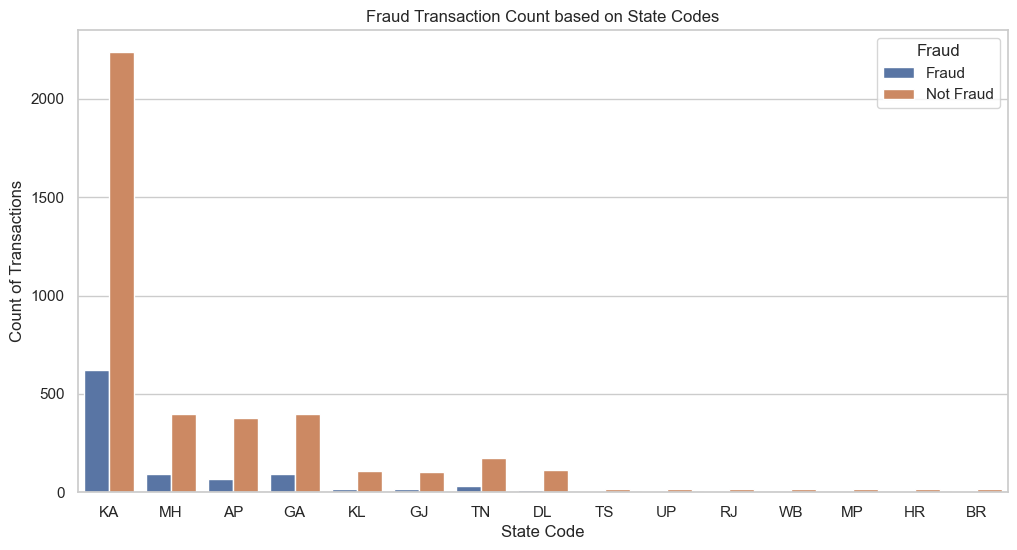

In [31]:
#Visualize fraud based on states
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="State_code",hue="Fraud_indicator")
plt.title("Fraud Transaction Count based on State Codes")
plt.xlabel("State Code")
plt.ylabel("Count of Transactions")
plt.legend(title = "Fraud")
plt.show

In [32]:
df["State_code"].value_counts()

State_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [33]:
df.loc[df["Fraud_indicator"]=="Fraud","State_code"].value_counts()

State_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

# Observation 4

1 . Highest fraud count is in Karnataka(KA)

In [34]:
# Analysise Timestamp to get the fraud / not fraud based on days
df["Timestamp"]

0        1/6/2023 11:20
1        1/7/2023 14:55
2        1/8/2023 18:25
3         1/9/2023 2:05
4        1/10/2023 6:35
             ...       
4995     1/1/2023 22:18
4996    1/17/2023 13:43
4997      2/5/2023 5:08
4998    2/20/2023 20:34
4999     3/10/2023 0:59
Name: Timestamp, Length: 5000, dtype: object

In [35]:
#Convert timestamp into dataframe
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [36]:
df["Hour"] = df["Timestamp"].dt.hour
df["DayOfWeek"] = df["Timestamp"].dt.dayofweek
df["Month"] = df["Timestamp"].dt.month

In [37]:
#drop timestamp feature
df = df.drop("Timestamp",axis=1)

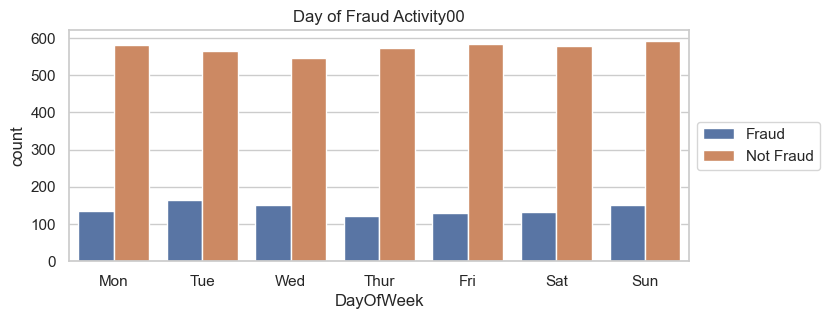

In [38]:
#visualise based in days
plt.figure(figsize=(8,3))
sns.countplot(data=df,x="DayOfWeek",hue="Fraud_indicator")
plt.title("Day of Fraud Activity00")
plt.legend(loc="center left",bbox_to_anchor = (1,0.5))
plt.xticks([0,1,2,3,4,5,6],["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.show()

## Correlation Matrix

In [39]:
numaricalDF = df.select_dtypes("number") # only numerical data

In [40]:
corr_matrix = numaricalDF.corr()
corr_matrix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


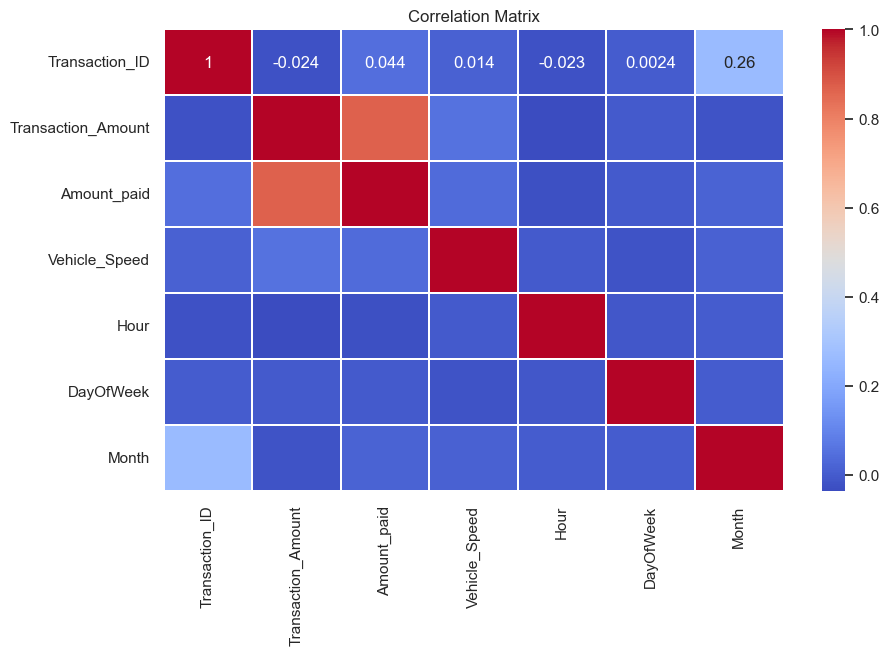

In [41]:
#plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidths=.2)
plt.title("Correlation Matrix")
plt.show()

In [42]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'State_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [43]:
#remove unecessary columns
df.drop(['Transaction_ID','FastagID', 'Geographical_Location'],axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   object
 8   State_code          5000 non-null   object
 9   Hour                5000 non-null   int32 
 10  DayOfWeek           5000 non-null   int32 
 11  Month               5000 non-null   int32 
dtypes: int32(3), int64(3), object(6)
memory usage: 410.3+ KB


In [45]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df.columns

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'State_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [47]:
object_columns = ['Vehicle_Type','Lane_Type','Vehicle_Dimensions','TollBoothID', 'State_code','Fraud_indicator']
#list of object columns
label_encoder = {}
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [48]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,State_code,Hour,DayOfWeek,Month
0,0,0,0,0,350,120,65,0,6,11,4,1
1,1,1,1,2,120,100,78,0,6,14,5,1
2,2,3,1,2,0,0,53,1,6,18,6,1
3,5,2,1,0,350,120,92,0,6,2,0,1
4,6,1,0,1,140,100,60,0,6,6,1,1


In [49]:
label_encoder["Fraud_indicator"].classes_

array(['Fraud', 'Not Fraud'], dtype=object)

## Model Training

In [50]:
X = df.drop(columns=["Fraud_indicator"])
y = df["Fraud_indicator"]

In [51]:
#Split the X and y in train and testing
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [52]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (3500, 11)
X_test (1500, 11)
y_train (3500,)
y_test (1500,)


## Logistic Regression Model

In [53]:
# import the model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [54]:
#Fot the model
lr_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
#Predict
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

In [56]:
#import libraries for matrics
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score , f1_score , confusion_matrix

In [57]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [58]:
print("LR model results:\n")
print("Accuracy",accuracy)
print("Confusion matrix",conf_matrix)
print("Precision",precision)
print("Recall",recall)
print("F1 score",f1)

LR model results:

Accuracy 0.9833333333333333
Confusion matrix [[ 302   25]
 [   0 1173]]
Precision 0.9791318864774624
Recall 1.0
F1 score 0.9894559257697174


In [59]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       327
           1       0.98      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [60]:
#Function to evaluate model
def evaluate_model(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print("LR model results:\n")
print("Accuracy",accuracy)
print("Confusion matrix",conf_matrix)
print("Precision",precision)
print("Recall",recall)
print("F1 score",f1)

LR model results:

Accuracy 0.9833333333333333
Confusion matrix [[ 302   25]
 [   0 1173]]
Precision 0.9791318864774624
Recall 1.0
F1 score 0.9894559257697174


In [61]:
#testing all models
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier

## Decision Tree

In [62]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train,y_train)

y_tree_pred = Tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
#Accuracy of Decision Tree
print("Decision Tree model evaluation:\n")
accuracy = accuracy_score(y_test,y_tree_pred)
Confusion_matrix = confusion_matrix(y_test,y_tree_pred)
Precision = precision_score(y_test,y_tree_pred)
recall = recall_score(y_test,y_tree_pred)
f1 = f1_score(y_test,y_tree_pred)
print("Accuracy ",accuracy)
print("Confusion Matrix",Confusion_matrix)
print("Precision",Precision)
print("Recall",recall)
print("F1 Score",f1)

Decision Tree model evaluation:

Accuracy  0.9986666666666667
Confusion Matrix [[ 325    2]
 [   0 1173]]
Precision 0.9982978723404256
Recall 1.0
F1 Score 0.9991482112436115


# Support Vector Machine

In [64]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score , f1_score , confusion_matrix
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [65]:
y_pred_svc_model = svc_model.predict(X_test)

print("Support Vector Classifier Model Evaluation:\n")
accuracy_svm = accuracy_score(y_test,y_pred_svc_model)
Confusion_matrix_svm = confusion_matrix(y_test,y_pred_svc_model)
Precision_svm= precision_score(y_test,y_pred_svc_model)
recall_svm = recall_score(y_test,y_pred_svc_model)
f1_svm= f1_score(y_test,y_pred_svc_model)
print("Accuracy ",accuracy_svm)
print("Confusion Matrix",Confusion_matrix_svm)
print("Precision",Precision_svm)
print("Recall",recall_svm)
print("F1 Score",f1_svm)

Support Vector Classifier Model Evaluation:

Accuracy  0.9793333333333333
Confusion Matrix [[ 296   31]
 [   0 1173]]
Precision 0.9742524916943521
Recall 1.0
F1 Score 0.9869583508624316


## Random Forest

In [66]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classifier Model Evaluation:\n")
accuracy_rf = accuracy_score(y_test,rf_y_pred)
Confusion_matrix_rf = confusion_matrix(y_test,rf_y_pred)
Precision_rf= precision_score(y_test,rf_y_pred)
recall_rf = recall_score(y_test,rf_y_pred)
f1_rf= f1_score(y_test,rf_y_pred)
print("Accuracy ",accuracy_rf)
print("Confusion Matrix",Confusion_matrix_rf)
print("Precision",Precision_rf)
print("Recall",recall_rf)
print("F1 Score",f1_rf)

Random Forest Classifier Model Evaluation:

Accuracy  0.982
Confusion Matrix [[ 300   27]
 [   0 1173]]
Precision 0.9775
Recall 1.0
F1 Score 0.988621997471555


# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
knn_y_pred  = knn_model.predict(X_test)

print("KNN Classifier Model Evaluation:\n")
accuracy = accuracy_score(y_test,knn_y_pred)
Confusion_matrix = confusion_matrix(y_test,knn_y_pred)
Precision = precision_score(y_test,knn_y_pred)
recall = recall_score(y_test,knn_y_pred)
f1 = f1_score(y_test,knn_y_pred)
print("Accuracy ",accuracy)
print("Confusion Matrix",Confusion_matrix)
print("Precision",Precision)
print("Recall",recall)
print("F1 Score",f1)

KNN Classifier Model Evaluation:

Accuracy  0.9873333333333333
Confusion Matrix [[ 308   19]
 [   0 1173]]
Precision 0.9840604026845637
Recall 1.0
F1 Score 0.9919661733615222


Text(0.5, 1.0, 'Comparison of Accuracy Scores of Different Models')

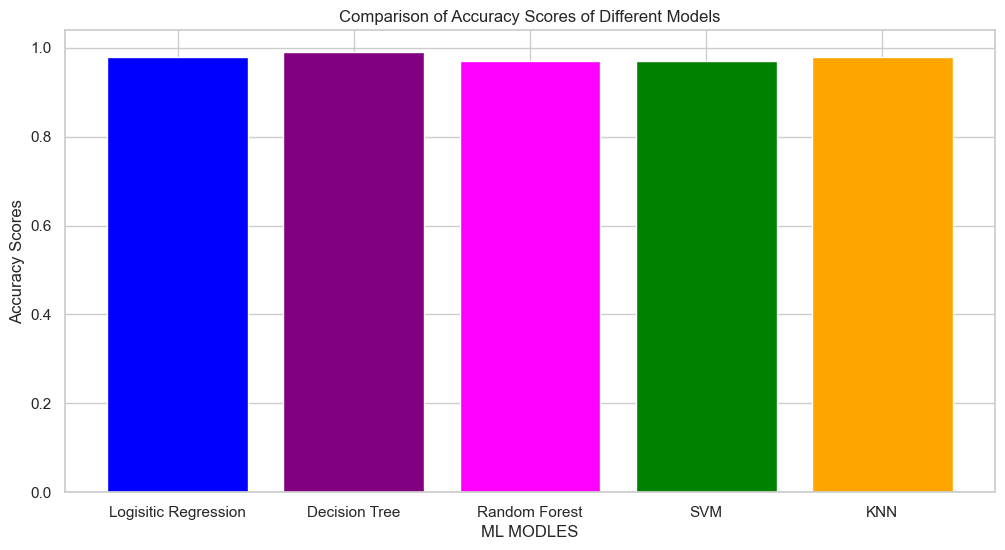

In [95]:
#Lets Visualisie

models = ["Logisitic Regression","Decision Tree","Random Forest","SVM","KNN"]
accuracy_scores = [0.98,0.99,0.97,0.97,0.98]
colors = ["blue","purple","magenta","green","orange"]
plt.figure(figsize=(12,6))


plt.bar(models,accuracy_scores,color = colors)
plt.xlabel("ML MODLES")
plt.ylabel("Accuracy Scores")
plt.title("Comparison of Accuracy Scores of Different Models")

# Conclusion

1 . Decision Tree 
    . highest accuracy (99%)
    . overall top performing model